
--- Linear Regression ---
[[8175    7]
 [  14   12]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8182
         1.0       0.63      0.46      0.53        26

    accuracy                           1.00      8208
   macro avg       0.81      0.73      0.77      8208
weighted avg       1.00      1.00      1.00      8208

ROC-AUC: 0.9982795254122558

--- Decision Tree ---
Best Params: {'max_depth': 7, 'min_samples_split': 5}
[[8179    3]
 [   3   23]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8182
         1.0       0.88      0.88      0.88        26

    accuracy                           1.00      8208
   macro avg       0.94      0.94      0.94      8208
weighted avg       1.00      1.00      1.00      8208

ROC-AUC: 0.9411560084989564

--- SVM ---
Best Params: {'C': 1, 'kernel': 'rbf'}
[[8181    1]
 [   8   18]]
              precision    recall  f1-score   support

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:53:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:53:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:53:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:53:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:53:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


--- XGBoost ---
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
[[8179    3]
 [   2   24]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8182
         1.0       0.89      0.92      0.91        26

    accuracy                           1.00      8208
   macro avg       0.94      0.96      0.95      8208
weighted avg       1.00      1.00      1.00      8208

ROC-AUC: 0.9998495759923284


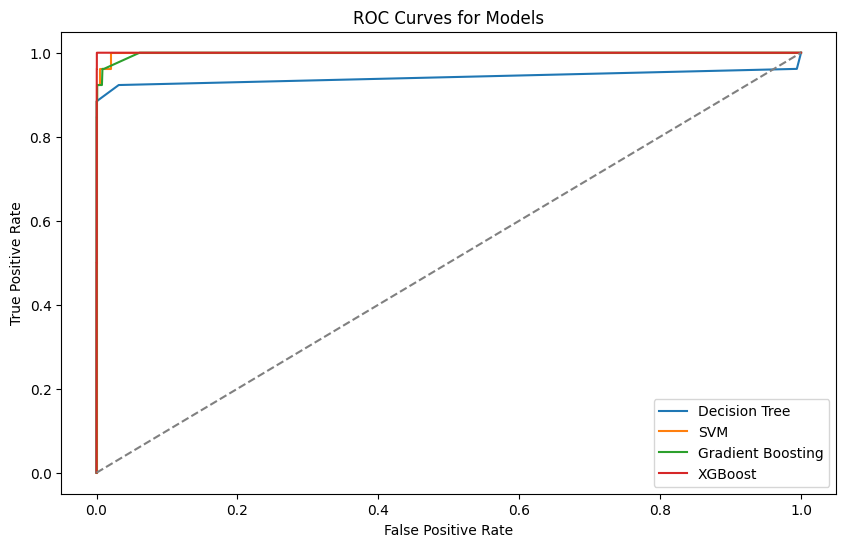

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load dataset
data = pd.read_csv(r"/content/creditcard(1).csv")
X = data.drop(columns=["Class"])
y = data["Class"]

data = data.dropna(subset=['Class'])
X = data.drop(columns=["Class"])
y = data["Class"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25, stratify=y)

# Scaling for SVM & Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------
# 1️⃣ Linear Regression (for baseline)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = (lr.predict(X_test_scaled) >= 0.5).astype(int)
print("\n--- Linear Regression ---")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict(X_test_scaled)))

# ------------------------------
# 2️⃣ Decision Tree with GridSearchCV
param_dt = {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}
dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_dt, cv=3, scoring='roc_auc')
dt.fit(X_train, y_train)
print("\n--- Decision Tree ---")
print("Best Params:", dt.best_params_)
print(confusion_matrix(y_test, dt.predict(X_test)))
print(classification_report(y_test, dt.predict(X_test)))
print("ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

# ------------------------------
# 3️⃣ SVM with GridSearchCV
param_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(SVC(probability=True, random_state=0), param_svm, cv=3, scoring='roc_auc')
svm.fit(X_train_scaled, y_train)
print("\n--- SVM ---")
print("Best Params:", svm.best_params_)
print(confusion_matrix(y_test, svm.predict(X_test_scaled)))
print(classification_report(y_test, svm.predict(X_test_scaled)))
print("ROC-AUC:", roc_auc_score(y_test, svm.predict_proba(X_test_scaled)[:, 1]))

# ------------------------------
# 4️⃣ Gradient Boosting with GridSearchCV
param_gb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
gb = GridSearchCV(GradientBoostingClassifier(random_state=0), param_gb, cv=3, scoring='roc_auc')
gb.fit(X_train, y_train)
print("\n--- Gradient Boosting ---")
print("Best Params:", gb.best_params_)
print(confusion_matrix(y_test, gb.predict(X_test)))
print(classification_report(y_test, gb.predict(X_test)))
print("ROC-AUC:", roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))

# ------------------------------
# 5️⃣ XGBoost with GridSearchCV
param_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
xgb = GridSearchCV(XGBClassifier(random_state=0, scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss'),
                   param_xgb, cv=3, scoring='roc_auc')
xgb.fit(X_train, y_train)
print("\n--- XGBoost ---")
print("Best Params:", xgb.best_params_)
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test)))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

# ------------------------------
# Optional: Plot ROC Curves for all models
plt.figure(figsize=(10, 6))

def plot_roc(model, X, label):
    y_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=label)

plot_roc(dt.best_estimator_, X_test, "Decision Tree")
plot_roc(svm.best_estimator_, X_test_scaled, "SVM")
plot_roc(gb.best_estimator_, X_test, "Gradient Boosting")
plot_roc(xgb.best_estimator_, X_test, "XGBoost")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curves for Models")
plt.show()
